In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import re


%matplotlib inline
plt.style.use('ggplot')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["figure.figsize"] = (12,12)
pd.options.display.max_columns = None

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target
print(x[:3],'\n\n',y[:3])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]] 

 [0 0 0]


In [5]:
x_names = iris.feature_names
y_names = iris.target_names
print(x_names, '\n\n', y_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

 ['setosa' 'versicolor' 'virginica']


In [6]:
x_df = pd.DataFrame(x, columns=x_names)
y_df = pd.DataFrame(y, columns=['type'])

In [7]:
x_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y_df.head()

,type
0,0
1,0
2,0
3,0
4,0


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [10]:
x_pca_2 = pca.fit_transform(x_df)

In [11]:
x_pca_2[:2]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685]])

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
x_lda_2 = lda.transform(x)

In [13]:
x_lda_2[:2]

array([[-8.0849532 ,  0.32845422],
       [-7.1471629 , -0.75547326]])

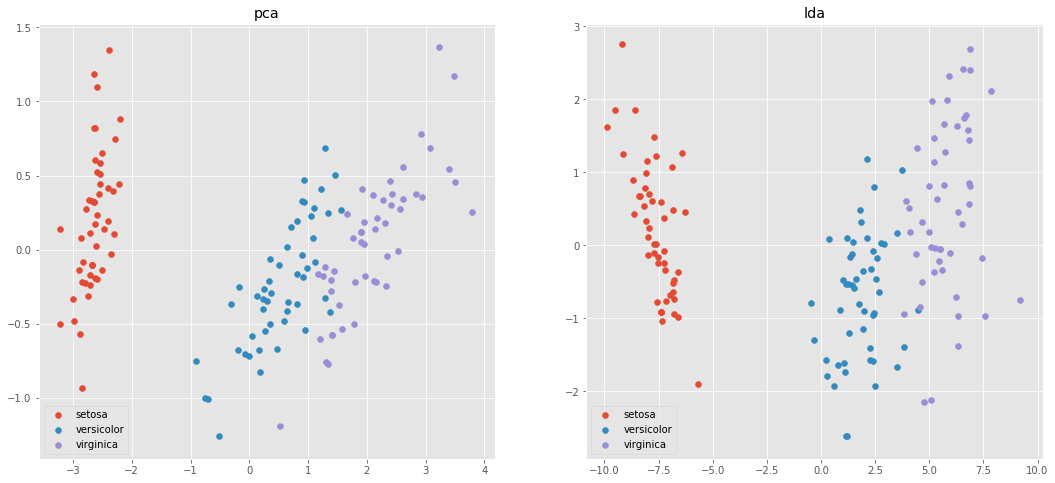

In [14]:
fig, axs = plt.subplots(1,2, figsize=(18,8))
for i in range(len(y_names)):
    axs[0].scatter(x_pca_2[y==i,0], x_pca_2[y==i,1], label=y_names[i])
for i in range(len(y_names)):
    axs[1].scatter(x_lda_2[y==i,0], x_lda_2[y==i,1], label=y_names[i])
axs[0].legend(loc='best')
axs[0].set_title('pca')
axs[1].legend(loc='best')
axs[1].set_title('lda')

In [15]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [16]:
rfc, etc, ada, dtc = RandomForestClassifier(), ExtraTreesClassifier(), AdaBoostClassifier(), DecisionTreeClassifier()
models = [rfc, etc, ada, dtc]

In [18]:
scores = []
for model in models:
    model.fit(x_df, y)
    scores.append(model.score(x_df, y_df))
scores

[0.99333333333333329, 1.0, 0.95999999999999996, 1.0]

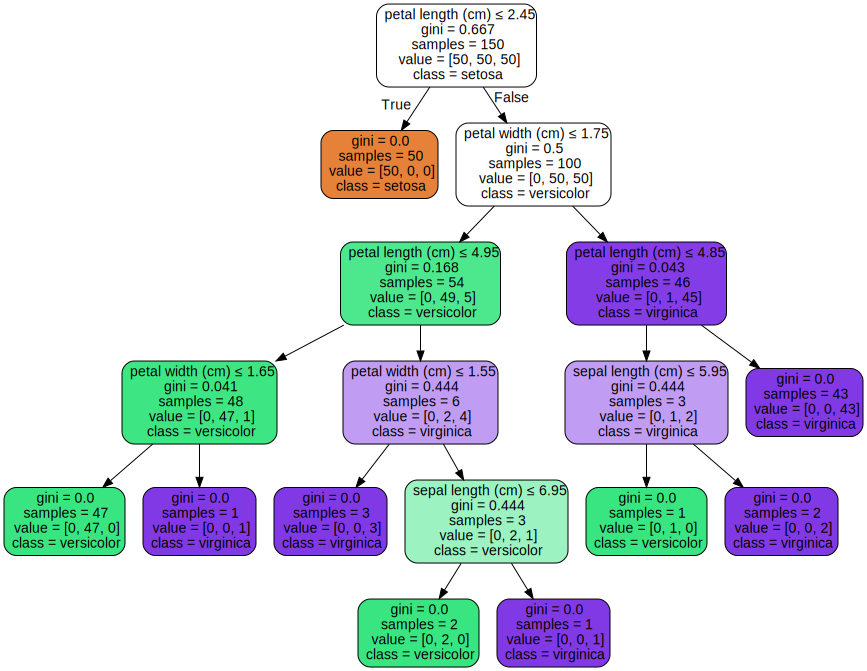

In [24]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(dtc, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

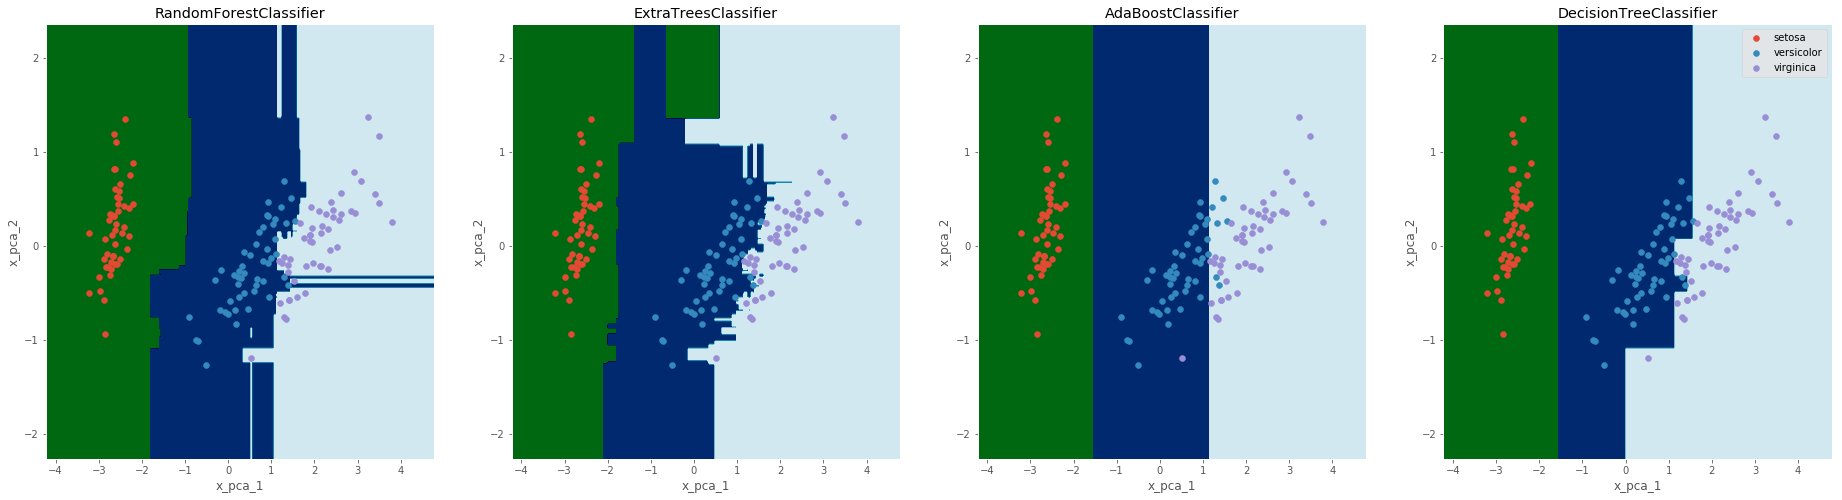

In [52]:
fig, axs = plt.subplots(1, 4, figsize=(32,8))
for modelidx, model in enumerate(models):
    clf = model.fit(x_pca_2, y)
    x_min, x_max = x_pca_2[:, 0].min() - 1, x_pca_2[:, 0].max() + 1
    y_min, y_max = x_pca_2[:, 1].min() - 1, x_pca_2[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = axs[modelidx].contourf(xx, yy, z, cmap=plt.cm.ocean)
    axs[modelidx].set_xlabel('x_pca_1')
    axs[modelidx].set_ylabel('x_pca_2')
    for i in range(3):
        axs[modelidx].scatter(x_pca_2[y==i, 0], x_pca_2[y==i, 1], label=y_names[i])
    axs[modelidx].set_title(model.__class__.__name__)

plt.legend()
plt.show()